In [1]:
import os
import sys, traceback
import numpy as np
import struct
import PIL.Image
import matplotlib.pyplot as plt
import scipy.misc
import os.path
import binascii
from pprint import pprint

%matplotlib inline
plt.rcParams['figure.figsize'] = (4.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:
# 读取图像和对应的汉字
def read_from_gnt_dir(gnt_dir):
    def one_file(f):
        header_size = 10
        while True:
            header = np.fromfile(f, dtype='uint8', count=header_size)
            if not header.size: break
            sample_size = header[0] + (header[1]<<8) + (header[2]<<16) + (header[3]<<24)
            tagcode = header[5] + (header[4]<<8)
            width = header[6] + (header[7]<<8)
            height = header[8] + (header[9]<<8)
            if header_size + width*height != sample_size:
                break
            image = np.fromfile(f, dtype='uint8', count=width*height).reshape((height, width))
            yield image, tagcode

    for file_name in os.listdir(gnt_dir):
        if file_name.endswith('.gnt'):
            file_path = os.path.join(gnt_dir, file_name)
            with open(file_path, 'rb') as f:
                for image, tagcode in one_file(f):
                    yield image, tagcode

def resize_and_normalize_image(img):
    # 补方
    pad_size = abs(img.shape[0]-img.shape[1]) // 2
    if img.shape[0] < img.shape[1]:
        pad_dims = ((pad_size, pad_size), (0, 0))
    else:
        pad_dims = ((0, 0), (pad_size, pad_size))
    img = np.lib.pad(img, pad_dims, mode='constant', constant_values=255)
    # 缩放
    img = scipy.misc.imresize(img, (64 - 4*2, 64 - 4*2))
    img = np.lib.pad(img, ((4, 4), (4, 4)), mode='constant', constant_values=255)
    #assert img.shape == (64, 64)
    
    img = scipy.misc.imresize(img, (32,32))
    assert img.shape == (32, 32)

#     img = img.flatten()
#     像素值范围-1到1
#     img = (img - 128) / 128？
    return img

def write_image_to_dir(file_dir, image, label):
    file = None
    if os.path.isfile(file_dir) is False:
        file = open(file_dir, 'wb')
    else:
        file = open(file_dir, 'ab')
    image = image.flatten()
    file.write(np.int16(label))
    file.write(image)
    file.close()

def show_image(image, tagcode_unicode):
#   im = PIL.Image.fromarray(image)
#   im.convert('RGB').save(tagcode_unicode.encode('ascii','ignore') + str(train_counter) + '.png')
    print(tagcode_unicode)
    plt.imshow(image)
#         plt.title('%s' % (tagcode_unicode))
    plt.axis('off')
    plt.show()

words = {}
label = 0
def words_summery(tag):
    global label, words
    tagcode_unicode = struct.pack('>H', tag).decode('gb2312')
    word = words.get(tagcode)
    if word is not None:
        word['count']+=1
        l = word['label']
#         pprint(words)
#         sys.exit()
    else:
        words[tagcode] = {'count':1,'label':label,'w':tagcode_unicode}
        l = label
        label += 1
    return l

姑


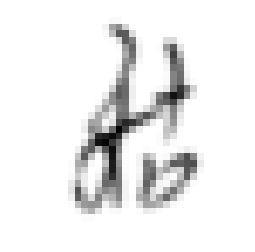

撰


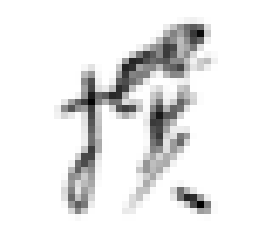

懦


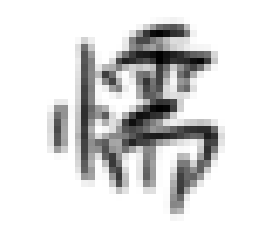

沦


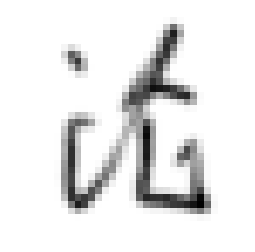

搏


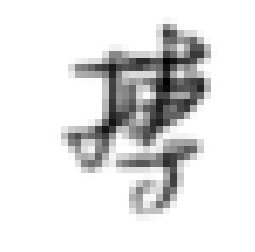

莲


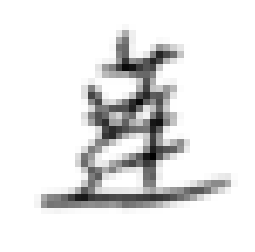

箩


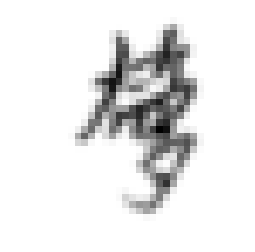

乙


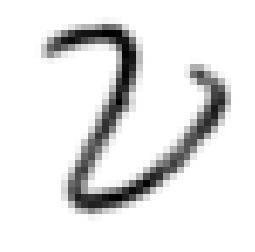

案


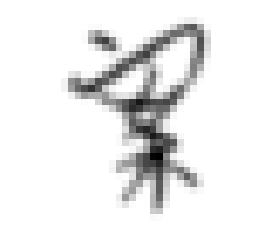

巍


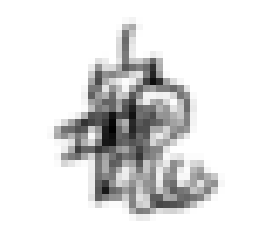

(897758, 223991)
{45217: {'category': 1235, 'count': 300, 'w': u'\u554a'},
 45218: {'category': 1236, 'count': 300, 'w': u'\u963f'},
 45219: {'category': 1237, 'count': 299, 'w': u'\u57c3'},
 45220: {'category': 1238, 'count': 299, 'w': u'\u6328'},
 45221: {'category': 1239, 'count': 299, 'w': u'\u54ce'},
 45222: {'category': 1240, 'count': 299, 'w': u'\u5509'},
 45223: {'category': 1241, 'count': 299, 'w': u'\u54c0'},
 45224: {'category': 1242, 'count': 300, 'w': u'\u7691'},
 45225: {'category': 1243, 'count': 299, 'w': u'\u764c'},
 45226: {'category': 1244, 'count': 299, 'w': u'\u853c'},
 45227: {'category': 1245, 'count': 297, 'w': u'\u77ee'},
 45228: {'category': 1246, 'count': 299, 'w': u'\u827e'},
 45229: {'category': 1247, 'count': 296, 'w': u'\u788d'},
 45230: {'category': 1248, 'count': 299, 'w': u'\u7231'},
 45231: {'category': 1249, 'count': 298, 'w': u'\u9698'},
 45232: {'category': 1250, 'count': 299, 'w': u'\u978d'},
 45233: {'category': 1251, 'count': 298, 'w': u'\u6c28'

 45800: {'category': 1494, 'count': 294, 'w': u'\u8336'},
 45801: {'category': 1495, 'count': 300, 'w': u'\u67e5'},
 45802: {'category': 1496, 'count': 300, 'w': u'\u78b4'},
 45803: {'category': 1497, 'count': 294, 'w': u'\u643d'},
 45804: {'category': 1498, 'count': 299, 'w': u'\u5bdf'},
 45805: {'category': 1499, 'count': 296, 'w': u'\u5c94'},
 45806: {'category': 1500, 'count': 299, 'w': u'\u5dee'},
 45807: {'category': 1501, 'count': 298, 'w': u'\u8be7'},
 45808: {'category': 1502, 'count': 299, 'w': u'\u62c6'},
 45809: {'category': 1503, 'count': 297, 'w': u'\u67f4'},
 45810: {'category': 1504, 'count': 297, 'w': u'\u8c7a'},
 45811: {'category': 1505, 'count': 297, 'w': u'\u6400'},
 45812: {'category': 1506, 'count': 299, 'w': u'\u63ba'},
 45813: {'category': 1507, 'count': 300, 'w': u'\u8749'},
 45814: {'category': 1508, 'count': 299, 'w': u'\u998b'},
 45815: {'category': 1509, 'count': 298, 'w': u'\u8c17'},
 45816: {'category': 1510, 'count': 298, 'w': u'\u7f20'},
 45817: {'cate

 46515: {'category': 1723, 'count': 300, 'w': u'\u515a'},
 46516: {'category': 1724, 'count': 300, 'w': u'\u8361'},
 46517: {'category': 1725, 'count': 300, 'w': u'\u6863'},
 46518: {'category': 1726, 'count': 298, 'w': u'\u5200'},
 46519: {'category': 1727, 'count': 300, 'w': u'\u6363'},
 46520: {'category': 1728, 'count': 299, 'w': u'\u8e48'},
 46521: {'category': 1729, 'count': 298, 'w': u'\u5012'},
 46522: {'category': 1730, 'count': 300, 'w': u'\u5c9b'},
 46523: {'category': 1731, 'count': 297, 'w': u'\u7977'},
 46524: {'category': 3751, 'count': 298, 'w': u'\u5bfc'},
 46525: {'category': 1732, 'count': 299, 'w': u'\u5230'},
 46526: {'category': 1733, 'count': 299, 'w': u'\u7a3b'},
 46527: {'category': 1734, 'count': 296, 'w': u'\u60bc'},
 46528: {'category': 1735, 'count': 299, 'w': u'\u9053'},
 46529: {'category': 1736, 'count': 300, 'w': u'\u76d7'},
 46530: {'category': 1737, 'count': 298, 'w': u'\u5fb7'},
 46531: {'category': 1738, 'count': 299, 'w': u'\u5f97'},
 46532: {'cate

 47317: {'category': 2038, 'count': 299, 'w': u'\u521a'},
 47318: {'category': 2039, 'count': 300, 'w': u'\u94a2'},
 47319: {'category': 2040, 'count': 293, 'w': u'\u7f38'},
 47320: {'category': 2041, 'count': 300, 'w': u'\u809b'},
 47321: {'category': 2042, 'count': 300, 'w': u'\u7eb2'},
 47322: {'category': 2043, 'count': 300, 'w': u'\u5c97'},
 47323: {'category': 2044, 'count': 298, 'w': u'\u6e2f'},
 47324: {'category': 2045, 'count': 297, 'w': u'\u6760'},
 47325: {'category': 2046, 'count': 298, 'w': u'\u7bd9'},
 47326: {'category': 2047, 'count': 296, 'w': u'\u768b'},
 47327: {'category': 2048, 'count': 300, 'w': u'\u9ad8'},
 47328: {'category': 2049, 'count': 299, 'w': u'\u818f'},
 47329: {'category': 2050, 'count': 299, 'w': u'\u7f94'},
 47330: {'category': 2051, 'count': 299, 'w': u'\u7cd5'},
 47331: {'category': 2052, 'count': 299, 'w': u'\u641e'},
 47332: {'category': 2053, 'count': 298, 'w': u'\u9550'},
 47333: {'category': 2054, 'count': 298, 'w': u'\u7a3f'},
 47334: {'cate

 47850: {'category': 2245, 'count': 299, 'w': u'\u5b8f'},
 47851: {'category': 2246, 'count': 299, 'w': u'\u5f18'},
 47852: {'category': 2247, 'count': 300, 'w': u'\u7ea2'},
 47853: {'category': 2248, 'count': 298, 'w': u'\u5589'},
 47854: {'category': 2249, 'count': 298, 'w': u'\u4faf'},
 47855: {'category': 2250, 'count': 300, 'w': u'\u7334'},
 47856: {'category': 2251, 'count': 300, 'w': u'\u543c'},
 47857: {'category': 2252, 'count': 300, 'w': u'\u539a'},
 47858: {'category': 2253, 'count': 299, 'w': u'\u5019'},
 47859: {'category': 2254, 'count': 299, 'w': u'\u540e'},
 47860: {'category': 2255, 'count': 296, 'w': u'\u547c'},
 47861: {'category': 2256, 'count': 298, 'w': u'\u4e4e'},
 47862: {'category': 2257, 'count': 300, 'w': u'\u5ffd'},
 47863: {'category': 2258, 'count': 300, 'w': u'\u745a'},
 47864: {'category': 2259, 'count': 300, 'w': u'\u58f6'},
 47865: {'category': 2260, 'count': 300, 'w': u'\u846b'},
 47866: {'category': 2261, 'count': 297, 'w': u'\u80e1'},
 47867: {'cate

 48546: {'category': 2455, 'count': 295, 'w': u'\u8230'},
 48547: {'category': 2456, 'count': 300, 'w': u'\u5251'},
 48548: {'category': 2457, 'count': 299, 'w': u'\u996f'},
 48549: {'category': 2458, 'count': 300, 'w': u'\u6e10'},
 48550: {'category': 2459, 'count': 298, 'w': u'\u6e85'},
 48551: {'category': 2460, 'count': 300, 'w': u'\u6da7'},
 48552: {'category': 2461, 'count': 300, 'w': u'\u5efa'},
 48553: {'category': 2462, 'count': 299, 'w': u'\u50f5'},
 48554: {'category': 2463, 'count': 300, 'w': u'\u59dc'},
 48555: {'category': 2464, 'count': 299, 'w': u'\u5c06'},
 48556: {'category': 2465, 'count': 299, 'w': u'\u6d46'},
 48557: {'category': 2466, 'count': 300, 'w': u'\u6c5f'},
 48558: {'category': 2467, 'count': 299, 'w': u'\u7586'},
 48559: {'category': 2468, 'count': 300, 'w': u'\u848b'},
 48560: {'category': 2469, 'count': 298, 'w': u'\u6868'},
 48561: {'category': 2470, 'count': 297, 'w': u'\u5956'},
 48562: {'category': 2471, 'count': 300, 'w': u'\u8bb2'},
 48563: {'cate

 49348: {'category': 2771, 'count': 300, 'w': u'\u6ee5'},
 49349: {'category': 2772, 'count': 299, 'w': u'\u7405'},
 49350: {'category': 2773, 'count': 300, 'w': u'\u6994'},
 49351: {'category': 2774, 'count': 300, 'w': u'\u72fc'},
 49352: {'category': 2775, 'count': 297, 'w': u'\u5eca'},
 49353: {'category': 2776, 'count': 298, 'w': u'\u90ce'},
 49354: {'category': 2777, 'count': 299, 'w': u'\u6717'},
 49355: {'category': 2778, 'count': 298, 'w': u'\u6d6a'},
 49356: {'category': 2779, 'count': 300, 'w': u'\u635e'},
 49357: {'category': 2780, 'count': 299, 'w': u'\u52b3'},
 49358: {'category': 2781, 'count': 298, 'w': u'\u7262'},
 49359: {'category': 2782, 'count': 299, 'w': u'\u8001'},
 49360: {'category': 2783, 'count': 296, 'w': u'\u4f6c'},
 49361: {'category': 2784, 'count': 299, 'w': u'\u59e5'},
 49362: {'category': 2785, 'count': 295, 'w': u'\u916a'},
 49363: {'category': 2786, 'count': 299, 'w': u'\u70d9'},
 49364: {'category': 2787, 'count': 298, 'w': u'\u6d9d'},
 49365: {'cate

 50172: {'category': 3109, 'count': 300, 'w': u'\u547d'},
 50173: {'category': 3110, 'count': 299, 'w': u'\u8c2c'},
 50174: {'category': 3111, 'count': 300, 'w': u'\u6478'},
 50337: {'category': 3112, 'count': 298, 'w': u'\u6479'},
 50338: {'category': 3113, 'count': 300, 'w': u'\u8611'},
 50339: {'category': 3114, 'count': 299, 'w': u'\u6a21'},
 50340: {'category': 3115, 'count': 300, 'w': u'\u819c'},
 50341: {'category': 3116, 'count': 299, 'w': u'\u78e8'},
 50342: {'category': 3117, 'count': 300, 'w': u'\u6469'},
 50343: {'category': 3118, 'count': 300, 'w': u'\u9b54'},
 50344: {'category': 3119, 'count': 300, 'w': u'\u62b9'},
 50345: {'category': 3120, 'count': 297, 'w': u'\u672b'},
 50346: {'category': 3121, 'count': 298, 'w': u'\u83ab'},
 50347: {'category': 3122, 'count': 299, 'w': u'\u58a8'},
 50348: {'category': 3123, 'count': 297, 'w': u'\u9ed8'},
 50349: {'category': 3124, 'count': 299, 'w': u'\u6cab'},
 50350: {'category': 3125, 'count': 299, 'w': u'\u6f20'},
 50351: {'cate

 50901: {'category': 3351, 'count': 299, 'w': u'\u666e'},
 50902: {'category': 3352, 'count': 300, 'w': u'\u6d66'},
 50903: {'category': 3353, 'count': 300, 'w': u'\u8c31'},
 50904: {'category': 3354, 'count': 299, 'w': u'\u66dd'},
 50905: {'category': 3355, 'count': 296, 'w': u'\u7011'},
 50906: {'category': 3356, 'count': 300, 'w': u'\u671f'},
 50907: {'category': 3357, 'count': 298, 'w': u'\u6b3a'},
 50908: {'category': 3358, 'count': 298, 'w': u'\u6816'},
 50909: {'category': 3359, 'count': 299, 'w': u'\u621a'},
 50910: {'category': 3360, 'count': 298, 'w': u'\u59bb'},
 50911: {'category': 3361, 'count': 299, 'w': u'\u4e03'},
 50912: {'category': 3362, 'count': 297, 'w': u'\u51c4'},
 50913: {'category': 3363, 'count': 296, 'w': u'\u6f06'},
 50914: {'category': 3364, 'count': 299, 'w': u'\u67d2'},
 50915: {'category': 3365, 'count': 300, 'w': u'\u6c8f'},
 50916: {'category': 3366, 'count': 300, 'w': u'\u5176'},
 50917: {'category': 3367, 'count': 300, 'w': u'\u68cb'},
 50918: {'cate

 51671: {'category': 3635, 'count': 299, 'w': u'\u52fa'},
 51672: {'category': 3636, 'count': 299, 'w': u'\u97f6'},
 51673: {'category': 3637, 'count': 298, 'w': u'\u5c11'},
 51674: {'category': 3638, 'count': 300, 'w': u'\u54e8'},
 51675: {'category': 3639, 'count': 299, 'w': u'\u90b5'},
 51676: {'category': 3640, 'count': 298, 'w': u'\u7ecd'},
 51677: {'category': 3641, 'count': 297, 'w': u'\u5962'},
 51678: {'category': 3642, 'count': 296, 'w': u'\u8d4a'},
 51679: {'category': 3643, 'count': 299, 'w': u'\u86c7'},
 51680: {'category': 3644, 'count': 298, 'w': u'\u820c'},
 51681: {'category': 3645, 'count': 299, 'w': u'\u820d'},
 51682: {'category': 3646, 'count': 296, 'w': u'\u8d66'},
 51683: {'category': 3647, 'count': 300, 'w': u'\u6444'},
 51684: {'category': 3648, 'count': 299, 'w': u'\u5c04'},
 51685: {'category': 3649, 'count': 295, 'w': u'\u6151'},
 51686: {'category': 3650, 'count': 299, 'w': u'\u6d89'},
 51687: {'category': 3651, 'count': 297, 'w': u'\u793e'},
 51688: {'cate

 52412: {'category': 139, 'count': 299, 'w': u'\u78b3'},
 52413: {'category': 140, 'count': 295, 'w': u'\u63a2'},
 52414: {'category': 141, 'count': 297, 'w': u'\u53f9'},
 52415: {'category': 142, 'count': 299, 'w': u'\u70ad'},
 52416: {'category': 143, 'count': 296, 'w': u'\u6c64'},
 52417: {'category': 144, 'count': 299, 'w': u'\u5858'},
 52418: {'category': 145, 'count': 297, 'w': u'\u642a'},
 52419: {'category': 146, 'count': 298, 'w': u'\u5802'},
 52420: {'category': 147, 'count': 298, 'w': u'\u68e0'},
 52421: {'category': 148, 'count': 299, 'w': u'\u819b'},
 52422: {'category': 149, 'count': 297, 'w': u'\u5510'},
 52423: {'category': 150, 'count': 299, 'w': u'\u7cd6'},
 52424: {'category': 151, 'count': 299, 'w': u'\u5018'},
 52425: {'category': 152, 'count': 295, 'w': u'\u8eba'},
 52426: {'category': 153, 'count': 299, 'w': u'\u6dcc'},
 52427: {'category': 154, 'count': 299, 'w': u'\u8d9f'},
 52428: {'category': 155, 'count': 296, 'w': u'\u70eb'},
 52429: {'category': 156, 'coun

 53183: {'category': 424, 'count': 299, 'w': u'\u5ce1'},
 53184: {'category': 425, 'count': 300, 'w': u'\u4fa0'},
 53185: {'category': 426, 'count': 298, 'w': u'\u72ed'},
 53186: {'category': 427, 'count': 300, 'w': u'\u4e0b'},
 53187: {'category': 428, 'count': 298, 'w': u'\u53a6'},
 53188: {'category': 429, 'count': 298, 'w': u'\u590f'},
 53189: {'category': 430, 'count': 298, 'w': u'\u5413'},
 53190: {'category': 431, 'count': 299, 'w': u'\u6380'},
 53191: {'category': 432, 'count': 299, 'w': u'\u9528'},
 53192: {'category': 433, 'count': 300, 'w': u'\u5148'},
 53193: {'category': 434, 'count': 300, 'w': u'\u4ed9'},
 53194: {'category': 435, 'count': 300, 'w': u'\u9c9c'},
 53195: {'category': 436, 'count': 295, 'w': u'\u7ea4'},
 53196: {'category': 437, 'count': 299, 'w': u'\u54b8'},
 53197: {'category': 438, 'count': 300, 'w': u'\u8d24'},
 53198: {'category': 439, 'count': 292, 'w': u'\u8854'},
 53199: {'category': 440, 'count': 298, 'w': u'\u8237'},
 53200: {'category': 441, 'coun

 53936: {'category': 691, 'count': 297, 'w': u'\u91ce'},
 53937: {'category': 692, 'count': 296, 'w': u'\u51b6'},
 53938: {'category': 693, 'count': 300, 'w': u'\u4e5f'},
 53939: {'category': 694, 'count': 299, 'w': u'\u9875'},
 53940: {'category': 695, 'count': 296, 'w': u'\u6396'},
 53941: {'category': 696, 'count': 300, 'w': u'\u4e1a'},
 53942: {'category': 697, 'count': 299, 'w': u'\u53f6'},
 53943: {'category': 698, 'count': 297, 'w': u'\u66f3'},
 53944: {'category': 699, 'count': 298, 'w': u'\u814b'},
 53945: {'category': 700, 'count': 301, 'w': u'\u591c'},
 53946: {'category': 701, 'count': 299, 'w': u'\u6db2'},
 53947: {'category': 702, 'count': 299, 'w': u'\u4e00'},
 53948: {'category': 703, 'count': 297, 'w': u'\u58f9'},
 53949: {'category': 704, 'count': 300, 'w': u'\u533b'},
 53950: {'category': 705, 'count': 299, 'w': u'\u63d6'},
 53951: {'category': 706, 'count': 300, 'w': u'\u94f1'},
 53952: {'category': 707, 'count': 300, 'w': u'\u4f9d'},
 53953: {'category': 708, 'coun

 54708: {'category': 977, 'count': 301, 'w': u'\u6cbe'},
 54709: {'category': 978, 'count': 302, 'w': u'\u76cf'},
 54710: {'category': 979, 'count': 299, 'w': u'\u65a9'},
 54711: {'category': 980, 'count': 299, 'w': u'\u8f97'},
 54712: {'category': 981, 'count': 299, 'w': u'\u5d2d'},
 54713: {'category': 982, 'count': 301, 'w': u'\u5c55'},
 54714: {'category': 983, 'count': 297, 'w': u'\u8638'},
 54715: {'category': 984, 'count': 299, 'w': u'\u6808'},
 54716: {'category': 985, 'count': 301, 'w': u'\u5360'},
 54717: {'category': 986, 'count': 300, 'w': u'\u6218'},
 54718: {'category': 987, 'count': 301, 'w': u'\u7ad9'},
 54719: {'category': 988, 'count': 300, 'w': u'\u6e5b'},
 54720: {'category': 989, 'count': 300, 'w': u'\u7efd'},
 54721: {'category': 990, 'count': 300, 'w': u'\u6a1f'},
 54722: {'category': 991, 'count': 301, 'w': u'\u7ae0'},
 54723: {'category': 992, 'count': 299, 'w': u'\u5f70'},
 54724: {'category': 993, 'count': 300, 'w': u'\u6f33'},
 54725: {'category': 994, 'coun

In [ ]:
train_data_dir = "/home/data/HWDB1-train/"
test_data_dir = "/home/data/HWDB1-test/"
train_binary = "/home/data/HWDB1-bin/train.bin"
test_binary = "/home/data/HWDB1-bin/test.bin"

# 统计样本数
train_counter = 0
test_counter = 0


for image, tagcode in read_from_gnt_dir(gnt_dir=train_data_dir):  
    l = words_summery(tagcode)
    image = resize_and_normalize_image(image)
    write_image_to_dir(train_binary, image, l)
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    # 提取点图像, 看看什么样
    train_counter += 1
    if train_counter % 100000 == 0:
        show_image(image, tagcode_unicode)
    
for image, tagcode in read_from_gnt_dir(gnt_dir=test_data_dir):
    l = words_summery(tagcode)
    image = resize_and_normalize_image(image)
    write_image_to_dir(test_binary, image, l)
    tagcode_unicode = struct.pack('>H', tagcode).decode('gb2312')
    test_counter += 1
    if test_counter % 100000 == 0:
        show_image(image, tagcode_unicode)

# 样本数
print(train_counter, test_counter)

# statistic
pprint(words)

In [21]:
import binascii
x = np.array([[0, 1], [2, 3]]).astype('uint8')
print(type(x))
print(binascii.hexlify(x.tobytes()))

<type 'numpy.ndarray'>
00010203
